In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/covid_data_2020-2021.csv")
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861480 entries, 0 to 5861479
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 447.2+ MB


In [4]:
df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [5]:
df['test_year'] = df['test_date'].str[:4].astype(int)
df['test_month'] = df['test_date'].str[5:7].astype(int)
df['test_day'] = df['test_date'].str[8:10].astype(int)

In [6]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_year,test_month,test_day
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other,2021,10,11
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other,2021,10,11
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other,2021,10,11
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other,2021,10,11
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other,2021,10,11


In [7]:
df.drop(columns=['test_date'], inplace=True)

In [8]:
df['corona_result'] = df['corona_result'].map({'Negative': 0, 'Positive': 1})
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['age_60_and_above'] = df['age_60_and_above'].map({'No': 0, 'Yes': 1})

In [9]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_year,test_month,test_day
0,0,0,0,0,0,0,1,0,Other,2021,10,11
1,0,0,0,0,0,0,1,1,Other,2021,10,11
2,0,0,0,0,0,0,0,0,Other,2021,10,11
3,0,0,0,0,0,0,1,0,Other,2021,10,11
4,0,0,0,0,0,0,1,0,Other,2021,10,11


In [10]:
df['test_indication'] = df['test_indication'].map({'Abroad': 'abroad', 'Contact with confirmed': 'contact_with_covid_positive_patient', 'Other': 'other'})
df = pd.get_dummies(df, columns = ['test_indication'])

In [11]:
x= df.drop(columns=['corona_result'])
y = df['corona_result']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [13]:
ypred = model.predict(xtest)

In [14]:
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.91093


In [15]:
correlation_matrix = df.corr()

<Figure size 1000x800 with 0 Axes>

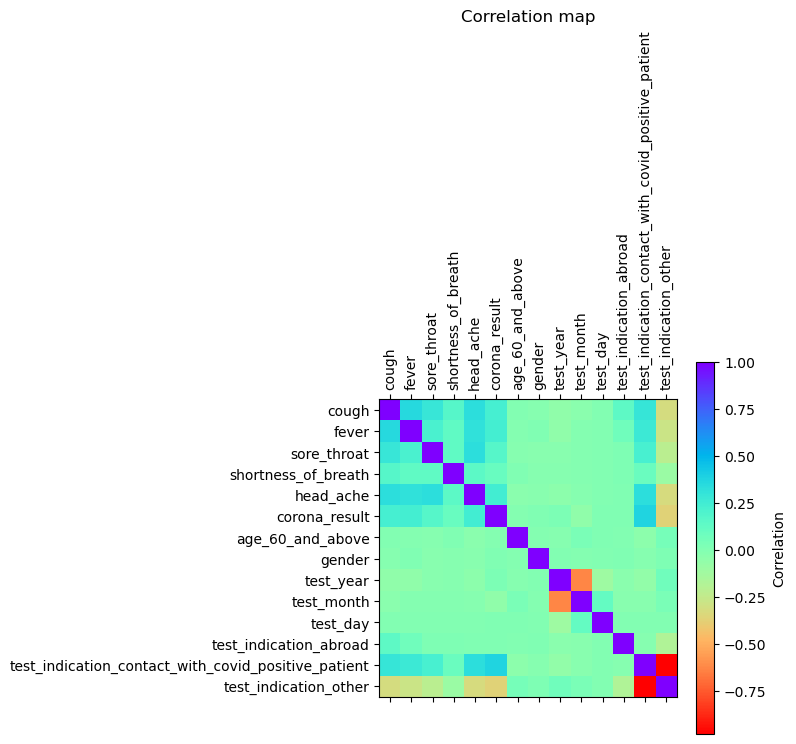

In [20]:
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='rainbow_r')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation map')
plt.show()

In [17]:
from sklearn.metrics import precision_score, confusion_matrix, mean_squared_error, f1_score, recall_score

In [18]:
print(f"The confusion matrix is \n {confusion_matrix(ytest,ypred)}")
print(f"The accuracy score id {accuracy_score(ytest,ypred)}")
print(f"The precision score is {precision_score(ytest,ypred, average=None, zero_division=0)}")
print(f"The F1 score is {f1_score(ytest,ypred)}")
print(f"The MSE score is {mean_squared_error(ytest,ypred)}")

The confusion matrix is 
 [[1053848   17386]
 [  87034   14028]]
The accuracy score id 0.9109269331295168
The precision score is [0.92371341 0.44655249]
The F1 score is 0.2117817566955524
The MSE score is 0.08907306687048322
